In [1]:
import sys
sys.path.append("../")

import os
%matplotlib inline
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
from scipy import stats
import engarde.decorators as ed

import statsmodels.formula.api as smf
from linearmodels import PanelOLS
#from library import test

/Users/kylieleblancKylie/anaconda/envs/spacy/lib/python3.7/site-packages/linearmodels/panel/data.py:10: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import (Categorical, DataFrame, Index, MultiIndex, Panel, Series,


In [2]:
data_path = '/Users/kylieleblancKylie/domino/dofis/data/'
table_path = '/Users/kylieleblancKylie/domino/dofis/results/Who Needs Rules/'
data = pd.read_csv(os.path.join(data_path, 'clean', 'gdid_subject.csv'),
                  sep=",", low_memory= False)
data = data[data.doi == True]
data.sample()

,Unnamed: 0,campus,year,test,score,score_std,campname,campischarter,district,distname,...,middle_math,middle_reading,middle_science,algebra,biology,eng1,math,reading,avescores,treatpost
281101,281101,212905117,2015,m_5th_avescore,1572.0,-0.307208,RICE EL,N,212905,TYLER ISD,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.069308,0.57086,0.250776,False


In [3]:
data[data.year == 2014].doi_year.value_counts().sort_index()

2016.0     5181
2017.0    23753
2018.0     5594
2019.0     1121
Name: doi_year, dtype: int64

# Graph by year of implementation

In [4]:
def create_group_df(df):
    new_df = pd.DataFrame(df.groupby(['year']).agg({'score_std': ['mean', 'sem']}))
    new_df = new_df.rename(columns = {'mean': 'score_mean', 'sem': 'score_se'})
    new_df['ub'] = new_df['score_std']['score_mean'] + new_df['score_std']['score_se']
    new_df['lb'] = new_df['score_std']['score_mean'] - new_df['score_std']['score_se']
    return new_df
df_treat2016 = create_group_df(data[data.doi_year == 2016])
df_treat2017 = create_group_df(data[data.doi_year == 2017])
df_treat2018 = create_group_df(data[data.doi_year == 2018])
df_charter = create_group_df(data[data.distischarter == 'Y'])
df_treat2016

score_std                  ub        lb
     score_mean  score_se                    
year                                         
2012   0.062978  0.013810  0.076788  0.049169
2013   0.109676  0.014153  0.123829  0.095524
2014   0.159178  0.014035  0.173212  0.145143
2015   0.146503  0.014303  0.160807  0.132200
2016   0.310052  0.014508  0.324560  0.295544
2017   0.316099  0.015542  0.331641  0.300558
2018   0.397026  0.015214  0.412241  0.381812
2019   0.505381  0.015301  0.520682  0.490079

# Full Set of Years and Groups

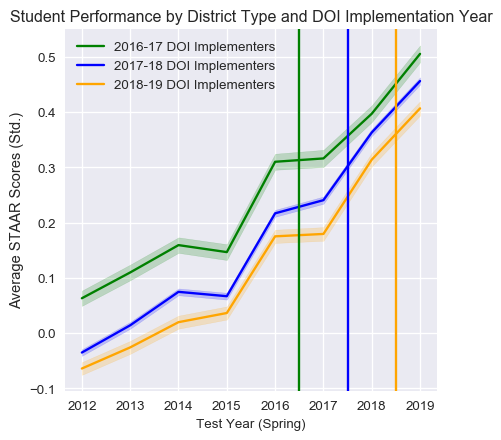

In [5]:
plt.style.use('seaborn')
my_dpi=96
plt.figure(figsize=(480/my_dpi, 480/my_dpi), dpi=my_dpi)
years = [2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019] 
# Pre
#plt.plot(list(df_charter.index), df_charter['avescores']['score_mean'], color = 'yellow', label = 'Charter')
plt.plot(list(df_treat2016.index), df_treat2016['score_std']['score_mean'], color = 'green', label = '2016-17 DOI Implementers')
plt.plot(list(df_treat2017.index), df_treat2017['score_std']['score_mean'], color = 'blue', label = '2017-18 DOI Implementers')
plt.plot(list(df_treat2018.index), df_treat2018['score_std']['score_mean'], color = 'orange', label = '2018-19 DOI Implementers')

plt.legend()


plt.fill_between(list(df_treat2016.index), df_treat2016.lb, df_treat2016.ub, color = 'green', alpha = .2)
plt.fill_between(list(df_treat2017.index), df_treat2017.lb, df_treat2017.ub, color = 'blue', alpha = .2)
plt.fill_between(list(df_treat2018.index), df_treat2018.lb, df_treat2018.ub, color = 'orange', alpha = .2)

plt.axvline(x = 2016.5, color = 'green')
plt.axvline(x = 2017.5, color = 'blue')
plt.axvline(x = 2018.5, color = 'orange')



plt.ylabel('Average STAAR Scores (Std.)')
plt.title('Student Performance by District Type and DOI Implementation Year')
plt.xlabel('Test Year (Spring)', size = 'medium')


plt.savefig(table_path + 'all districts and dates.png', dpi = 600, bbox_inches="tight")
plt.show()

# Evidence of Parallel Trends

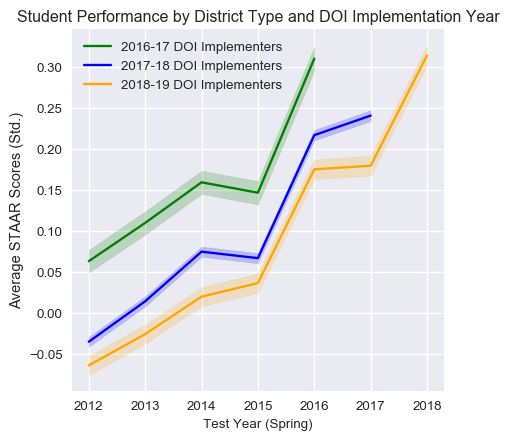

In [6]:
plt.style.use('seaborn')
my_dpi=96
plt.figure(figsize=(480/my_dpi, 480/my_dpi), dpi=my_dpi)

# Pre
plt.plot(list(df_treat2016[df_treat2016.index <= 2016].index), df_treat2016[df_treat2016.index <= 2016]['score_std']['score_mean'], color = 'green', label = '2016-17 DOI Implementers')
plt.plot(list(df_treat2017[df_treat2017.index <= 2017].index), df_treat2017[df_treat2017.index <= 2017]['score_std']['score_mean'], color = 'blue', label = '2017-18 DOI Implementers')
plt.plot(list(df_treat2018[df_treat2018.index <= 2018].index), df_treat2018[df_treat2018.index <= 2018]['score_std']['score_mean'], color = 'orange', label = '2018-19 DOI Implementers')

plt.legend()

plt.fill_between(list(df_treat2016[df_treat2016.index <= 2016].index), df_treat2016[df_treat2016.index <= 2016].lb, df_treat2016[df_treat2016.index <= 2016].ub, color = 'green', alpha = .2)
plt.fill_between(list(df_treat2017[df_treat2017.index <= 2017].index), df_treat2017[df_treat2017.index <= 2017].lb, df_treat2017[df_treat2017.index <= 2017].ub, color = 'blue', alpha = .2)
plt.fill_between(list(df_treat2018[df_treat2018.index <= 2018].index), df_treat2018[df_treat2018.index <= 2018].lb, df_treat2018[df_treat2018.index <= 2018].ub, color = 'orange', alpha = .2)


plt.ylabel('Average STAAR Scores (Std.)')
plt.title('Student Performance by District Type and DOI Implementation Year')
plt.xlabel('Test Year (Spring)', size = 'medium')

plt.savefig(table_path + 'parallel_trends_by_adoption.png', bbox_inches="tight")

plt.show()

# Visual Impact by Subject

In [7]:
def create_group_df(df, outcome):
    df['outcome'] = df[outcome]
    new_df = pd.DataFrame(df.groupby(['year']).agg({'outcome': ['mean', 'sem']}))
    new_df = new_df.rename(columns = {'mean': 'outcome_mean', 'sem': 'outcome_se'})
    new_df['ub'] = new_df['outcome']['outcome_mean'] + new_df['outcome']['outcome_se']
    new_df['lb'] = new_df['outcome']['outcome_mean'] - new_df['outcome']['outcome_se']
    return new_df

/Users/kylieleblancKylie/anaconda/envs/spacy/lib/python3.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


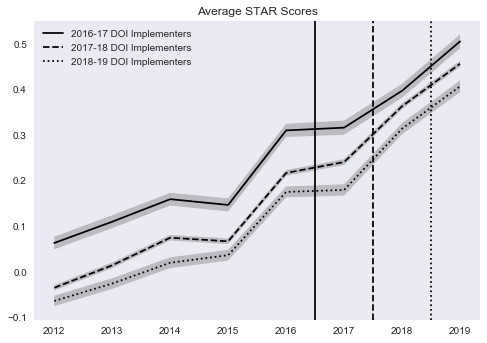

In [8]:
from matplotlib import lines, markers
from cycler import cycler
outcome = 'score_std'
# Create cycler object. Use any styling from above you please
df_treat2016 = create_group_df(data[data.doi_year == 2016], outcome = outcome)
df_treat2017 = create_group_df(data[data.doi_year == 2017], outcome = outcome)
df_treat2018 = create_group_df(data[data.doi_year == 2018], outcome = outcome)

monochrome = (cycler('color', ['k']) * cycler('linestyle', ['-', '--', ':', '=.']))

fig, ax = plt.subplots(1,1)
ax.set_prop_cycle(monochrome)

ax.plot(list(df_treat2016.index), df_treat2016['outcome']['outcome_mean'], label = '2016-17 DOI Implementers')
ax.plot(list(df_treat2017.index), df_treat2017['outcome']['outcome_mean'],label = '2017-18 DOI Implementers')
ax.plot(list(df_treat2018.index), df_treat2018['outcome']['outcome_mean'], label = '2018-19 DOI Implementers')

ax.legend()


ax.fill_between(list(df_treat2016.index), df_treat2016.lb, df_treat2016.ub, alpha = .2)
ax.fill_between(list(df_treat2017.index), df_treat2017.lb, df_treat2017.ub, alpha = .2)
ax.fill_between(list(df_treat2018.index), df_treat2018.lb, df_treat2018.ub, alpha = .2)

ax.axvline(x = 2016.5, linestyle = '-', color = 'black')
ax.axvline(x = 2017.5, linestyle = '--', color = 'black')
ax.axvline(x = 2018.5, linestyle = ':', color = 'black')

ax.set_title('Average STAR Scores')
ax.grid(False)

fig.savefig(table_path + 'trends_by_adoption_' + 'score_std' + '.png', bbox_inches="tight")


In [9]:
df_treat2016['outcome']['outcome_mean']

year
2012    0.062978
2013    0.109676
2014    0.159178
2015    0.146503
2016    0.310052
2017    0.316099
2018    0.397026
2019    0.505381
Name: outcome_mean, dtype: float64

### One possible exemption in parallel trends comes between 2014-15 for the 2018-19 implementers. While other groups decrease, this group of districts see an increase in trends.

In [10]:
df_treat2016

outcome                   ub        lb
     outcome_mean outcome_se                    
year                                            
2012     0.062978   0.013810  0.076788  0.049169
2013     0.109676   0.014153  0.123829  0.095524
2014     0.159178   0.014035  0.173212  0.145143
2015     0.146503   0.014303  0.160807  0.132200
2016     0.310052   0.014508  0.324560  0.295544
2017     0.316099   0.015542  0.331641  0.300558
2018     0.397026   0.015214  0.412241  0.381812
2019     0.505381   0.015301  0.520682  0.490079

In [11]:
df_treat2016['outcome']['outcome_mean'].loc[2015]

0.1465034031117759

In [12]:
df_treat2016['outcome']['outcome_mean'].loc[2014]

0.15917784719885258

In [13]:
df_treat2017

outcome                   ub        lb
     outcome_mean outcome_se                    
year                                            
2012    -0.035289   0.005994 -0.029295 -0.041282
2013     0.014021   0.006192  0.020213  0.007829
2014     0.074573   0.006139  0.080712  0.068434
2015     0.066679   0.006203  0.072882  0.060476
2016     0.216705   0.006286  0.222990  0.210419
2017     0.240566   0.006586  0.247151  0.233980
2018     0.363060   0.006384  0.369444  0.356676
2019     0.456243   0.006650  0.462893  0.449593

In [14]:
df_treat2018

outcome                   ub        lb
     outcome_mean outcome_se                    
year                                            
2012    -0.064218   0.011503 -0.052715 -0.075721
2013    -0.025986   0.011680 -0.014307 -0.037666
2014     0.019683   0.011763  0.031447  0.007920
2015     0.036264   0.011855  0.048120  0.024409
2016     0.175062   0.011953  0.187015  0.163108
2017     0.179393   0.012348  0.191741  0.167045
2018     0.313899   0.012295  0.326194  0.301603
2019     0.406729   0.012883  0.419611  0.393846

#### Significant differentail trends?

In [19]:
did_df = data[(data.year == 2014) | (data.year == 2015)]
did_df['treat_placebo'] = np.where(did_df.doi_year == 2018, 1, 0)
did_df['post_placebo'] = np.where(did_df.year > 2014, 1, 0)
did_df['treat_post_placebo'] = did_df.treat_placebo * did_df.post_placebo
did_df.sample()

/Users/kylieleblancKylie/anaconda/envs/spacy/lib/python3.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/Users/kylieleblancKylie/anaconda/envs/spacy/lib/python3.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/Users/kylieleblancKylie/anaconda/envs/spacy/lib/python3.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy 

,Unnamed: 0,campus,year,test,score,score_std,campname,campischarter,district,distname,...,algebra,biology,eng1,math,reading,avescores,treatpost,treat_placebo,post_placebo,treat_post_placebo
255640,255640,181901103,2014,m_5th_avescore,1598.0,0.075619,BRIDGE CITY INT,N,181901,BRIDGE CITY ISD,...,NaN,NaN,NaN,0.626079,0.232548,0.429314,False,0,0,0


In [20]:
did_df = data[(data.year == 2014) | (data.year == 2015)]
did_df['treat_placebo'] = np.where(did_df.doi_year == 2018, 1, 0)
did_df['post_placebo'] = np.where(did_df.year > 2014, 1, 0)
did_df['treat_post_placebo'] = did_df.treat_placebo * did_df.post_placebo

did_df = did_df.reset_index()
did_df['year'] = pd.to_datetime(did_df['year'], format='%Y')
#add column year to index
did_df = did_df.set_index(['year', 'campus'])
#swap indexes
did_df.index = did_df.index.swaplevel(0,1)
did_df[['district', 'doi_year','treat_placebo', 'post_placebo', 'treat_post_placebo']].sample(5)

/Users/kylieleblancKylie/anaconda/envs/spacy/lib/python3.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/Users/kylieleblancKylie/anaconda/envs/spacy/lib/python3.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/Users/kylieleblancKylie/anaconda/envs/spacy/lib/python3.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy 

,,district,doi_year,treat_placebo,post_placebo,treat_post_placebo
campus,year,,,,,
249908001,2014-01-01,249908,2016.0,0,0,0
246909045,2014-01-01,246909,2016.0,0,0,0
108912120,2015-01-01,108912,2017.0,0,1,0
43902101,2014-01-01,43902,2017.0,0,0,0
145901002,2014-01-01,145901,2017.0,0,0,0


In [22]:
mod = PanelOLS.from_formula('score_std ~ 1 + treat_placebo + post_placebo + treat_post_placebo', did_df)
res = mod.fit(cov_type='clustered', cluster_entity=True)
print(res)

                          PanelOLS Estimation Summary                           
Dep. Variable:              score_std   R-squared:                        0.0005
Estimator:                   PanelOLS   R-squared (Between):              0.0008
No. Observations:               72255   R-squared (Within):               0.0001
Date:                Mon, Dec 02 2019   R-squared (Overall):              0.0005
Time:                        17:31:40   Log-likelihood                -9.908e+04
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      12.286
Entities:                        5813   P-value                           0.0000
Avg Obs:                       12.430   Distribution:                 F(3,72251)
Min Obs:                       1.0000                                           
Max Obs:                       36.000   F-statistic (robust):             3.2517
                            

In [23]:
change_2016 = df_treat2016['outcome']['outcome_mean'].loc[2015] - df_treat2016['outcome']['outcome_mean'].loc[2014]
print(change_2016)
change_2017 = df_treat2017['outcome']['outcome_mean'].loc[2015] - df_treat2017['outcome']['outcome_mean'].loc[2014]
print(change_2017)
change_2018 = df_treat2018['outcome']['outcome_mean'].loc[2015] - df_treat2018['outcome']['outcome_mean'].loc[2014]
print(change_2018)

-0.012674444087076686
-0.007893723317491955
0.016580840895159966


# Graph by Urbanicity

In [ ]:
data.type_urban

In [ ]:
from matplotlib import lines, markers
from cycler import cycler
outcome = 'score_std'
# Create cycler object. Use any styling from above you please
df_treat2016 = create_group_df(data[(data.doi_year == 2016) & (data.type_rural == 1)], outcome = outcome)
df_treat2017 = create_group_df(data[(data.doi_year == 2017) & (data.type_rural == 1)], outcome = outcome)
df_treat2018 = create_group_df(data[(data.doi_year == 2018) & (data.type_rural == 1)], outcome = outcome)

monochrome = (cycler('color', ['k']) * cycler('linestyle', ['-', '--', ':', '=.']))

fig, ax = plt.subplots(1,1)
ax.set_prop_cycle(monochrome)

ax.plot(list(df_treat2016.index), df_treat2016['outcome']['score_mean'], label = '2016-17 DOI Implementers')
ax.plot(list(df_treat2017.index), df_treat2017['outcome']['score_mean'],label = '2017-18 DOI Implementers')
ax.plot(list(df_treat2018.index), df_treat2018['outcome']['score_mean'], label = '2018-19 DOI Implementers')

ax.legend()


ax.fill_between(list(df_treat2016.index), df_treat2016.lb, df_treat2016.ub, alpha = .2)
ax.fill_between(list(df_treat2017.index), df_treat2017.lb, df_treat2017.ub, alpha = .2)
ax.fill_between(list(df_treat2018.index), df_treat2018.lb, df_treat2018.ub, alpha = .2)

ax.axvline(x = 2016.5, linestyle = '-', color = 'black')
ax.axvline(x = 2017.5, linestyle = '--', color = 'black')
ax.axvline(x = 2018.5, linestyle = ':', color = 'black')

ax.set_title('Average STAR Scores')
ax.grid(False)

#fig.savefig(table_path + 'trends_by_adoption_' + 'score_std' + '.png', bbox_inches="tight")


# Demographic Trends

In [ ]:
df_control = pd.DataFrame(data[data.doi == False].groupby(['year'])['students_hisp'].mean()).reset_index()
df_treat2016 = pd.DataFrame(data[data.doi_year == 2016].groupby(['year'])['students_hisp'].mean()).reset_index()
df_treat2017 = pd.DataFrame(data[data.doi_year == 2017].groupby(['year'])['students_hisp'].mean()).reset_index()
df_treat2018 = pd.DataFrame(data[data.doi_year == 2018].groupby(['year'])['students_hisp'].mean()).reset_index()
df_treat2018

In [ ]:
plt.style.use('seaborn')
my_dpi=96
plt.figure(figsize=(480/my_dpi, 480/my_dpi), dpi=my_dpi)

# Pre
#plt.plot(df_control.year, df_control.students_hisp, color = 'red', label = 'TPS')
plt.plot(df_treat2016.year, df_treat2016.students_hisp, color = 'green', label = '2016-17 Implementers')
plt.plot(df_treat2017.year, df_treat2017.students_hisp, color = 'blue', label = '2017-18 Implementers')
plt.plot(df_treat2018.year, df_treat2018.students_hisp, color = 'orange', label = '2018-19 Implementers')

plt.legend()



plt.ylabel('Percent Hispanic')
plt.title('Districts of Innovation and Student Performance')
plt.xlabel('Year', size = 'medium')

#plt.savefig(table_path + 'CITS.png', bbox_inches="tight")

plt.show()

## Number of Students

In [ ]:
df_control = pd.DataFrame(data[data.doi == False].groupby(['year'])['students_num_d'].mean()).reset_index()
df_treat2016 = pd.DataFrame(data[data.doi_year == 2016].groupby(['year'])['students_num_d'].mean()).reset_index()
df_treat2017 = pd.DataFrame(data[data.doi_year == 2017].groupby(['year'])['students_num_d'].mean()).reset_index()
df_treat2018 = pd.DataFrame(data[data.doi_year == 2018].groupby(['year'])['students_num_d'].mean()).reset_index()
df_treat2018

plt.style.use('seaborn')
my_dpi=96
plt.figure(figsize=(480/my_dpi, 480/my_dpi), dpi=my_dpi)

# Pre
plt.plot(df_treat2016.year, df_treat2016.students_num_d, color = 'green', label = '2015-16 Implementers')
plt.plot(df_treat2017.year, df_treat2017.students_num_d, color = 'blue', label = '2016-17 Implementers')
plt.plot(df_treat2018.year, df_treat2018.students_num_d, color = 'orange', label = '2017-18 Implementers')

plt.legend()



plt.ylabel('Number of Students')
plt.title('Districts of Innovation and Number of Students')
plt.xlabel('Year', size = 'medium')

#plt.savefig(table_path + 'CITS.png', bbox_inches="tight")

plt.show()

In [ ]:
#  Who are 2016-17 implementers
data[(data.doi_year == 2016) & (data.year == 2018)][['distname', 'students_num']]

# Inputs

In [ ]:
df_treat2016 = pd.DataFrame(data[data.doi_year == 2016].groupby(['year'])['stu_teach_ratio'].mean()).reset_index()
df_treat2017 = pd.DataFrame(data[data.doi_year == 2017].groupby(['year'])['stu_teach_ratio'].mean()).reset_index()
df_treat2018 = pd.DataFrame(data[data.doi_year == 2018].groupby(['year'])['stu_teach_ratio'].mean()).reset_index()

plt.style.use('seaborn')
my_dpi=96
plt.figure(figsize=(480/my_dpi, 480/my_dpi), dpi=my_dpi)

# Pre
plt.plot(df_treat2016[df_treat2016.year <= 2016].year, df_treat2016[df_treat2016.year <= 2016].stu_teach_ratio, color = 'green', label = '2016-17 Implementers')
plt.plot(df_treat2017[df_treat2017.year <= 2017].year, df_treat2017[df_treat2017.year <= 2017].stu_teach_ratio, color = 'blue', label = '2017-18 Implementers')
plt.plot(df_treat2018[df_treat2018.year <= 2018].year, df_treat2018[df_treat2018.year <= 2018].stu_teach_ratio, color = 'orange', label = '2018-19 Implementers')

plt.legend()



plt.ylabel('Number of Students')
plt.title('Districts of Innovation and Student Performance')
plt.xlabel('Year', size = 'medium')

#plt.savefig(table_path + 'CITS.png', bbox_inches="tight")

plt.show()

In [ ]:
df_treat2016 = pd.DataFrame(data[data.doi_year == 2016].groupby(['year'])['certification'].mean()).reset_index()
df_treat2017 = pd.DataFrame(data[data.doi_year == 2017].groupby(['year'])['certification'].mean()).reset_index()
df_treat2018 = pd.DataFrame(data[data.doi_year == 2018].groupby(['year'])['certification'].mean()).reset_index()

plt.style.use('seaborn')
my_dpi=96
plt.figure(figsize=(480/my_dpi, 480/my_dpi), dpi=my_dpi)

# Pre
plt.plot(df_treat2016[df_treat2016.year <= 2016].year, df_treat2016[df_treat2016.year <= 2016].certification, color = 'green', label = '2016-17 Implementers')
plt.plot(df_treat2017[df_treat2017.year <= 2017].year, df_treat2017[df_treat2017.year <= 2017].certification, color = 'blue', label = '2017-18 Implementers')
plt.plot(df_treat2018[df_treat2018.year <= 2018].year, df_treat2018[df_treat2018.year <= 2018].certification, color = 'orange', label = '2018-19 Implementers')

plt.legend()



plt.ylabel('Number of Students')
plt.title('Districts of Innovation and Student Performance')
plt.xlabel('Year', size = 'medium')

#plt.savefig(table_path + 'CITS.png', bbox_inches="tight")

plt.show()